In [75]:
import pandas
f_name = '180106_B_Image.txt'
folder = '../data/'
my_table = pandas.read_table(folder+f_name)
print("ALL COLUMNS\n")
for i in my_table.columns.values:
    print(i)

ALL COLUMNS

FileName_DAPI
FileName_DAPI_flatfield
FileName_Mts
Group_Index
Group_Number
ImageNumber
Intensity_MaxIntensity_Background_Mask
Intensity_MaxIntensity_MaskedMT_image
Intensity_MeanIntensity_Background_Mask
Intensity_MeanIntensity_MaskedMT_image
Intensity_MeanIntensity_Masked_Nuclei
Intensity_MedianIntensity_Background_Mask
Intensity_MedianIntensity_MaskedMT_image
Intensity_MinIntensity_Background_Mask
Intensity_MinIntensity_MaskedMT_image
Intensity_StdIntensity_Background_Mask
Intensity_StdIntensity_MaskedMT_image
Intensity_StdIntensity_Masked_Nuclei
Intensity_TotalArea_Background_Mask
Intensity_TotalArea_MaskedMT_image
Intensity_TotalArea_Masked_Nuclei
Intensity_TotalIntensity_Background_Mask
Intensity_TotalIntensity_MaskedMT_image
Intensity_TotalIntensity_Masked_Nuclei


In [76]:
#First Operation
my_table['Operation1'] =  my_table['Intensity_MeanIntensity_MaskedMT_image'] - my_table['Intensity_MeanIntensity_Background_Mask']
#print(my_table['Operation1'].describe())
my_table['Operation1'] = my_table['Operation1'].clip(lower=0)
#print(my_table['Operation1'].describe())

In [88]:
new_table = my_table.groupby('Group_Number')
means = new_table['Operation1'].mean()
stds = new_table['Operation1'].std()
# normalize with the last group
ele_num = len(means)
means = means/means[ele_num]
stds = stds/means[ele_num]

my_names = ['a','b','c','d','e','f','g','h']

means.index= my_names
stds.index= my_names


# for name, group in new_table:
#     print(name)
#     print(group['Intensity_MeanIntensity_Background_Mask'].mean())
#     print(group['Operation1'].sem())
#     print(group['Operation1'].mean())
#     print(group['Operation1'].std())
#     print(group['Operation1'].count())

#     print()
#     break

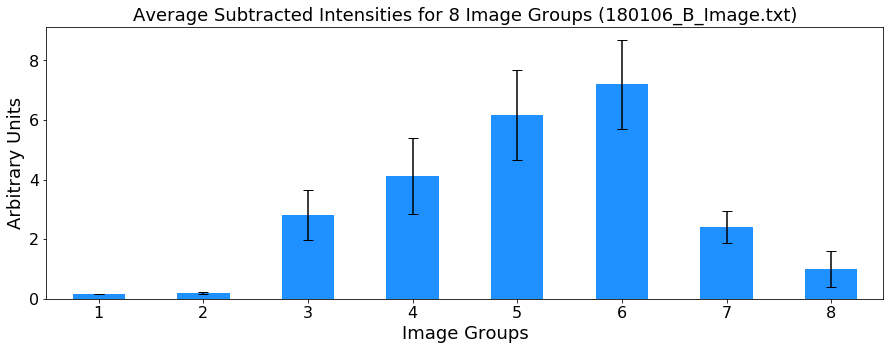

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid(True)

p = means.plot(figsize=(15,5),legend=False,kind="bar",rot=0,color="dodgerblue",fontsize=16,capsize = 5,yerr=stds);
p.set_title("Average Subtracted Intensities for 8 Image Groups ({})".format(f_name), fontsize=18);
p.set_xlabel("Image Groups", fontsize=18);
p.set_ylabel("Arbitrary Units", fontsize=18);
# p.set_ylim(0,1800);